In [51]:
import math
from collections import Counter
import matplotlib.pyplot as plt

from typing import List

In [6]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(f"Unique: {len(set(num_friends))} | Length: {len(num_friends)}")

Unique: 24 | Length: 204


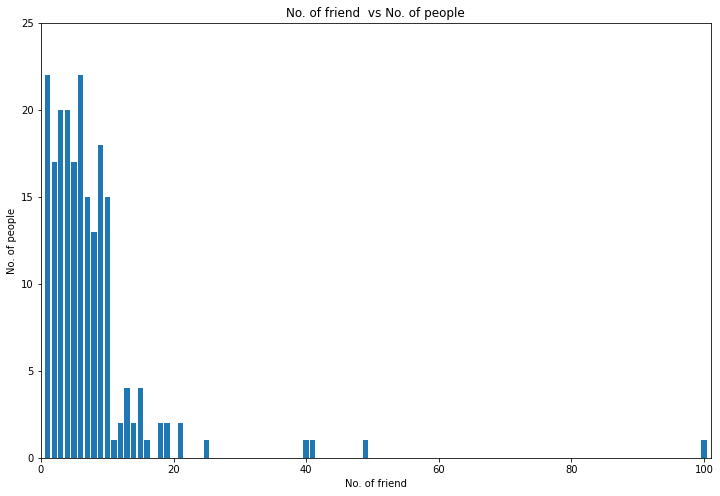

In [12]:
friend_count = Counter(num_friends)

# Data
xs = range(101)
ys = [friend_count[x] for x in xs]

# Plot
plt.figure(figsize=(12,8))
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("No. of friend  vs No. of people")
plt.xlabel("No. of friend")
plt.ylabel("No. of people");

get basic statistics

In [13]:
num_points = len(num_friends)
max_value = max(num_friends)
min_value = min(num_friends)

print(f"Data points: {num_points} | Max Value: {max_value} | Min Value: {min_value}")

Data points: 204 | Max Value: 100.0 | Min Value: 1


In [18]:
def mean(data: List[float]) -> float:
    return sum(data) / len(data)

In [19]:
mean(num_friends)

7.333333333333333

In [20]:
def _median_odd(data: List[float]) -> float:
    return sorted(data)[len(data) // 2]

def _median_even(data: List[float]) -> float:
    sorted_data = sorted(data)
    mid_point = len(data) // 2
    return 0.5*(sorted_data[mid_point] + sorted_data[mid_point - 1])

def median(data: List[float]) -> float:
    return _median_even(data) if len(data) % 2 == 0 else _median_odd(data)

In [22]:
# Sanity Check
assert median([1, 10, 2, 9, 5]) == 5 
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [21]:
median(num_friends)

6.0

In [24]:
1 < 4 < 3

False

In [32]:
# Quantile
def quantile(data: List[float], p: float) -> float:
    # check if 0 < p < 1
    assert 0 < p < 1, "p value must be between 0 and 1"
    return sorted(data)[int(p * len(data))]

In [33]:
quantile(num_friends, 1.2)

AssertionError: p value must be between 0 and 1

In [34]:
Counter(num_friends).values()

dict_values([1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 2, 4, 2, 1, 15, 18, 13, 15, 22, 17, 20, 20, 17, 22])

In [37]:
# Mode
def mode(data: List[float]) -> List[float]:
    data_count = Counter(data)
    return [key for key, value in data_count.items() if value == max(data_count.values())]

In [40]:
# Sanity check
assert set(mode(num_friends)) == {1,6}

In [41]:
# Data Range
def data_range(data: List[float]) -> float:
    return max(data) - min(data)

In [42]:
# Sanity check
assert data_range(num_friends) == 99

In [48]:
# Variance
def de_mean(data: List[float]) -> List[float]:
    xbar = mean(data)
    return [x-xbar for x in data]

def variance(data: List[float]) -> float:
    n = len(data)

    # Check data has 2 or more elements
    assert n >= 2

    deviation = de_mean(data)
    return sum([x*x for x in deviation]) / (n - 1)

In [49]:
# Sanity Check
assert 81.54 < variance(num_friends) < 81.55

In [52]:
# Satandard Deviation
def std(data: List[float]) -> float:
    return math.sqrt(variance(data))

In [54]:
# Sanity Checks
assert 9.02 < std(num_friends) < 9.04

In [55]:
# Interquantile
def inter_quantile(data: List[float]) -> float:
    return quantile(data, 0.75) - quantile(data, 0.25)

In [57]:
# Sanity check
assert inter_quantile(num_friends) == 6

Check correlation. Here is new data for comparisons.

In [58]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

In [62]:
def covariance(xs: List[float], ys: List[float]) -> float:
    # Check xs and ys has same length
    assert len(xs) == len(ys), "Both data need equal length"
    return sum([x*y for x, y in zip(de_mean(xs), de_mean(ys))]) / (len(xs) - 1)

In [64]:
# Sanity check
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43

In [65]:
def correlation(xs: List[float], ys: List[float]) -> float:
    std_x = std(xs)
    std_y = std(ys)

    if std_x > 0  and std_y > 0:
        return covariance(xs, ys) / std_x / std_y
    else:
        return 0

In [66]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25

The correlation is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation). <br>
A number like 0.25 represents a
relatively weak positive correlation

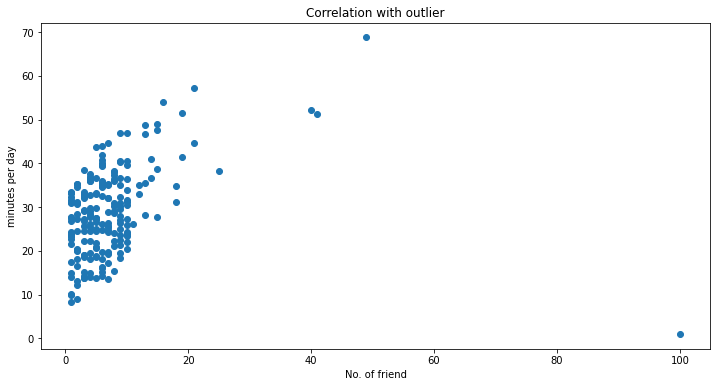

In [69]:
plt.figure(figsize=(12,6))
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with outlier")
plt.xlabel("No. of friend")
plt.ylabel("minutes per day");

In [75]:
print(*[[x] for x,y in zip(num_friends, daily_minutes) if x != 100])

[49, 68.77] [41, 51.25] [40, 52.08] [25, 38.36] [21, 44.54] [21, 57.13] [19, 51.4] [19, 41.42] [18, 31.22] [18, 34.76] [16, 54.01] [15, 38.79] [15, 47.59] [15, 49.1] [15, 27.66] [14, 41.03] [14, 36.73] [13, 48.65] [13, 28.12] [13, 46.62] [13, 35.57] [12, 32.98] [12, 35] [11, 26.07] [10, 23.77] [10, 39.73] [10, 40.57] [10, 31.65] [10, 31.21] [10, 36.32] [10, 20.45] [10, 21.93] [10, 26.02] [10, 27.34] [10, 23.49] [10, 46.94] [10, 30.5] [10, 33.8] [10, 24.23] [9, 21.4] [9, 27.94] [9, 32.24] [9, 40.57] [9, 25.07] [9, 19.42] [9, 22.39] [9, 18.42] [9, 46.96] [9, 23.72] [9, 26.41] [9, 26.97] [9, 36.76] [9, 40.32] [9, 35.02] [9, 29.47] [9, 30.2] [9, 31] [8, 38.11] [8, 38.18] [8, 36.31] [8, 21.03] [8, 30.86] [8, 36.07] [8, 28.66] [8, 29.08] [8, 37.28] [8, 15.28] [8, 24.17] [8, 22.31] [8, 30.17] [7, 25.53] [7, 19.85] [7, 35.37] [7, 44.6] [7, 17.23] [7, 13.47] [7, 26.33] [7, 35.02] [7, 32.09] [7, 24.81] [7, 19.33] [7, 28.77] [7, 24.26] [7, 31.98] [7, 25.73] [6, 24.86] [6, 16.28] [6, 34.51] [6, 15

In [77]:
# Without outlier
xs_o,ys_o = [x for x in num_friends if x != 100], [y for _,y in zip(num_friends, daily_minutes) if _ != 100]

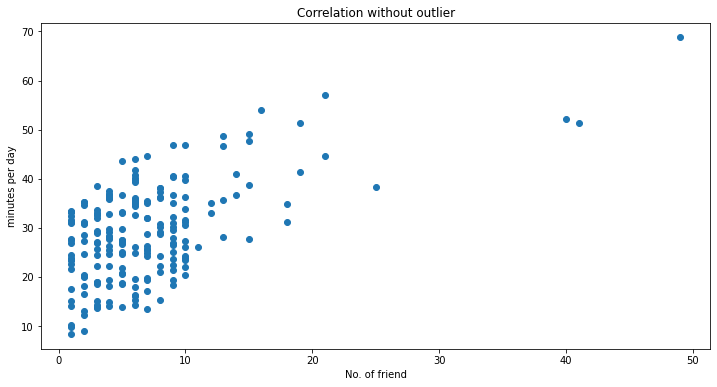

In [78]:
plt.figure(figsize=(12,6))
plt.scatter(xs_o, ys_o)
plt.title("Correlation without outlier")
plt.xlabel("No. of friend")
plt.ylabel("minutes per day");

In [79]:
correlation(xs_o, ys_o)

0.5736792115665573